In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegressionCV
# Transformers
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv(r"C:\Users\saiso\OneDrive\Documents\tweet_emotions.csv")

In [6]:
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [8]:
# Value Counts
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

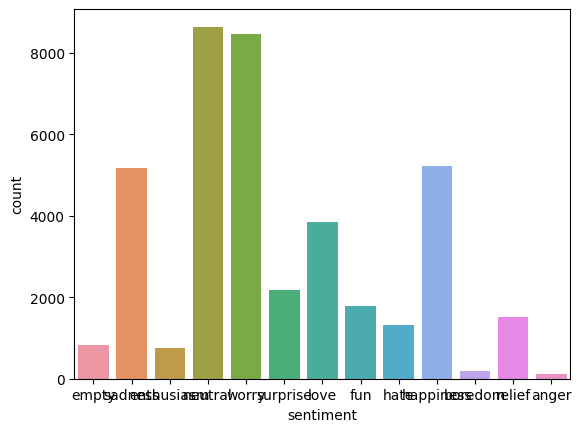

In [9]:
# Plot
sns.countplot(x='sentiment',data=df)

In [10]:

# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# User handles
df['Clean_Text'] = df['content'].apply(nfx.remove_userhandles)

In [13]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...


In [14]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [15]:
df

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"want trade Houston tickets, will."
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [16]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

In [17]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [18]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [19]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('Tf',CountVectorizer()),('Mb',LogisticRegressionCV())])

In [20]:
pipe_lr

Pipeline(steps=[('Tf', CountVectorizer()), ('Mb', LogisticRegressionCV())])

In [21]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Pipeline(steps=[('Tf', CountVectorizer()), ('Mb', LogisticRegressionCV())])

In [22]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.34458333333333335

In [23]:
# Make A Prediction
ex1 = "I am very  happy that I got job in Cognizant and I feel sad for my friend because he got disqualified in the exam"

In [24]:
pipe_lr.predict([ex1])

array(['sadness'], dtype=object)

In [25]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [26]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[4.54911884e-04, 2.72820901e-04, 1.03899389e-04, 4.86937896e-04,
        1.86570703e-03, 1.69019294e-03, 6.88772030e-03, 5.71834770e-03,
        1.61039272e-03, 3.37543658e-02, 6.62228427e-01, 1.08394906e-02,
        2.74086786e-01]])

In [27]:
#Metrics
y_pred=pipe_lr.predict(x_test)
a=classification_report(y_test, y_pred)
print ( classification_report(y_test, y_pred))


C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        33
     boredom       0.00      0.00      0.00        57
       empty       0.00      0.00      0.00       242
  enthusiasm       0.00      0.00      0.00       249
         fun       0.15      0.04      0.06       513
   happiness       0.34      0.33      0.34      1568
        hate       0.38      0.15      0.22       383
        love       0.46      0.40      0.43      1134
     neutral       0.34      0.60      0.44      2620
      relief       0.30      0.04      0.07       515
     sadness       0.34      0.26      0.29      1560
    surprise       0.20      0.05      0.08       625
       worry       0.33      0.41      0.37      2501

    accuracy                           0.34     12000
   macro avg       0.22      0.18      0.18     12000
weighted avg       0.32      0.34      0.31     12000



C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saiso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

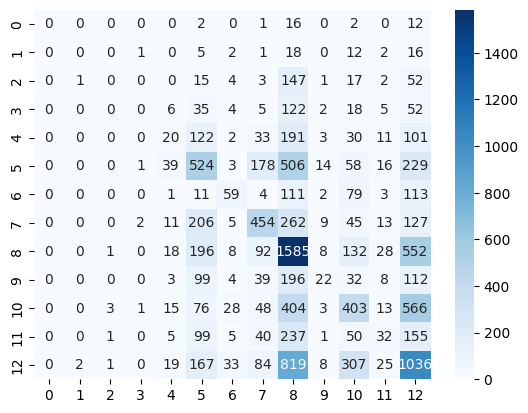

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues",fmt="d",cbar=True,annot_kws={"size":10})